In [2]:
import numpy as np
import pandas as pd
import joblib
import re
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
plt.style.use('ggplot')


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [12]:
df = pd.read_csv('/Users/John/Desktop/DS340W/data/NYPD_Complaint_Data_Final.csv')


/var/folders/r6/qcs_flrd7fj2bg8ml8rp61lc0000gn/T/ipykernel_70663/1642745220.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/John/Desktop/DS340W/data/NYPD_Complaint_Data_Final.csv')


In [14]:
df.head()
df = df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis = 1)

In [18]:
print(df.columns)
df.head()

Index(['CMPLNT_NUM', 'ADDR_PCT_CD', 'BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM',
       'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'CRM_ATPT_CPTD_CD', 'JURISDICTION_CODE',
       'JURIS_DESC', 'KY_CD', 'LAW_CAT_CD', 'LOC_OF_OCCUR_DESC', 'OFNS_DESC',
       'PATROL_BORO', 'PD_CD', 'PD_DESC', 'PREM_TYP_DESC', 'RPT_DT',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'VIC_AGE_GROUP', 'VIC_RACE',
       'VIC_SEX', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude',
       'CMPLNT_FR_YEAR', 'CMPLNT_FR_MONTH', 'CMPLNT_FR_DAY', 'geometry',
       'pop_est', 'zipcode', 'num_policestation', 'num_restroom'],
      dtype='object')


,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,JURISDICTION_CODE,JURIS_DESC,KY_CD,LAW_CAT_CD,LOC_OF_OCCUR_DESC,OFNS_DESC,PATROL_BORO,PD_CD,PD_DESC,PREM_TYP_DESC,RPT_DT,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,CMPLNT_FR_YEAR,CMPLNT_FR_MONTH,CMPLNT_FR_DAY,geometry,pop_est,zipcode,num_policestation,num_restroom
0,280510523,14,MANHATTAN,01/11/2024,04:00:00,NaN,NaN,COMPLETED,0,N.Y. POLICE DEPT,104,FELONY,INSIDE,RAPE,PATROL BORO MAN SOUTH,157.0,RAPE 1,HOTEL/MOTEL,01/14/2024,18-24,BLACK,U,18-24,BLACK,F,985764.0,213806.0,40.753533,-73.994537,2024,1,11,POINT (-73.9945368920152 40.7535327012632),9687.0,10018.0,1.0,0.0
1,286736978,122,STATEN ISLAND,01/01/2015,13:00:00,01/01/2015,15:00:00,COMPLETED,0,N.Y. POLICE DEPT,233,MISDEMEANOR,INSIDE,SEX CRIMES,PATROL BORO STATEN ISLAND,175.0,"SEXUAL ABUSE 3,2",RESIDENCE-HOUSE,05/11/2024,25-44,UNKNOWN,M,25-44,UNKNOWN,F,954827.0,148519.0,40.574286,-74.105914,2015,1,1,POINT (-74.1059144051212 40.5742856881925),53142.0,10306.0,1.0,9.0
2,289019347,1,MANHATTAN,06/20/2024,16:12:00,06/20/2024,16:13:00,COMPLETED,1,N.Y. TRANSIT POLICE,578,VIOLATION,NaN,HARRASSMENT 2,PATROL BORO MAN SOUTH,637.0,"HARASSMENT,SUBD 1,CIVILIAN",TRANSIT - NYC SUBWAY,06/20/2024,45-64,BLACK,M,25-44,BLACK,F,982466.0,197787.0,40.709556,-74.006435,2024,6,20,POINT (-74.00643483276845 40.70955616028041),22800.0,10038.0,1.0,5.0
3,283688417,121,STATEN ISLAND,03/11/2024,10:00:00,03/13/2024,13:20:00,COMPLETED,0,N.Y. POLICE DEPT,341,MISDEMEANOR,FRONT OF,PETIT LARCENY,PATROL BORO STATEN ISLAND,339.0,"LARCENY,PETIT FROM OPEN AREAS,",MAILBOX OUTSIDE,03/13/2024,NaN,NaN,NaN,25-44,BLACK,F,938414.0,170500.0,40.634542,-74.165142,2024,3,11,POINT (-74.165142 40.634542),25947.0,10303.0,0.0,2.0
4,280934552,122,STATEN ISLAND,11/14/2023,12:00:00,11/17/2023,12:00:00,COMPLETED,0,N.Y. POLICE DEPT,109,FELONY,INSIDE,GRAND LARCENY,PATROL BORO STATEN ISLAND,418.0,"LARCENY,GRAND BY ACQUIRING LOST CREDIT CARD",RESIDENCE-HOUSE,01/22/2024,NaN,NaN,NaN,65+,WHITE,M,941085.0,135276.0,40.537874,-74.155293,2023,11,14,POINT (-74.155293 40.537874),61741.0,10312.0,0.0,7.0


/var/folders/r6/qcs_flrd7fj2bg8ml8rp61lc0000gn/T/ipykernel_70663/3050718152.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.barplot(x='LAW_CAT_CD',y='CMPLNT_NUM',data=df2,palette=np.array(palette[::-1])[rank])
/var/folders/r6/qcs_flrd7fj2bg8ml8rp61lc0000gn/T/ipykernel_70663/3050718152.py:9: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  g=sns.barplot(x='LAW_CAT_CD',y='CMPLNT_NUM',data=df2,palette=np.array(palette[::-1])[rank])


Text(0.5, 1.0, 'Crime type distribution')

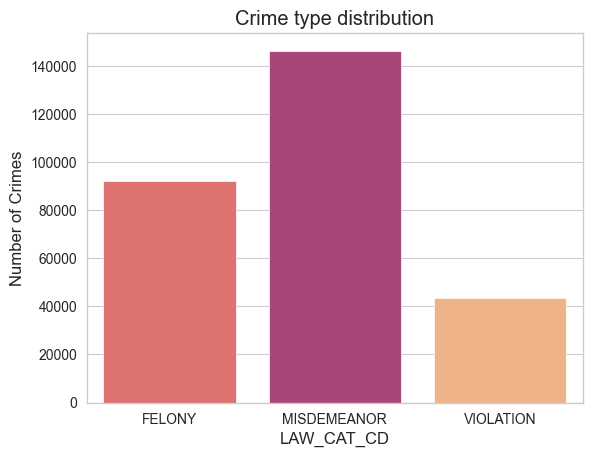

In [19]:
# Crimes type
df2=df.groupby(['LAW_CAT_CD'])['CMPLNT_NUM'].count().reset_index()
# plotting number of offences per offence level
sns.set_style('whitegrid')
palette = sns.color_palette("magma",5)
data = df.groupby(['LAW_CAT_CD'])['CMPLNT_NUM'].size()
rank = data.argsort().argsort()
# plotting
g=sns.barplot(x='LAW_CAT_CD',y='CMPLNT_NUM',data=df2,palette=np.array(palette[::-1])[rank])
#g=(g.set_axis_labels("Year","Number of Offences"))
plt.ylabel('Number of Crimes')
plt.ticklabel_format(style='plain', axis='y')
plt.title("Crime type distribution")